In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("User_test.csv", sep=";")
data.isnull().sum()
data

,day,sexe,age,general health,ease of activity,breathing problem,fatigue,overall pain,concentration,sleep quality,severity score,MLL
0,1,0,56,2,1,8,7,6,7,6,7.05,NaN
1,2,0,56,3,3,7,6,6,7,6,6.05,Yoga
2,3,0,56,4,5,5,5,5,8,7,4.90,Yoga
3,4,0,56,4,5,5,5,5,6,5,5.20,NaN
4,5,0,56,4,2,7,6,7,5,6,6.00,NaN
5,6,0,56,6,6,5,4,5,6,6,4.00,Yoga
6,7,0,56,6,8,3,4,4,5,7,3.55,Yoga
7,8,0,56,8,8,2,4,5,6,8,3.00,Yoga
8,9,0,56,6,8,1,2,4,5,5,2.85,Yoga
9,10,0,56,9,9,0,1,3,7,7,1.30,Yoga


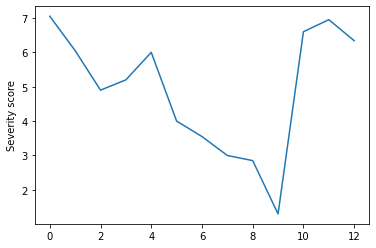

In [41]:
data['severity score'].plot()
plt.ylabel("Severity score")
plt.show()

In [42]:
mll = pd.get_dummies(data["MLL"])
data = pd.concat([data, mll], axis=1).drop("MLL", axis=1)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std  = scaler.transform(X_test)

In [50]:
grid_param = [{'alpha': np.logspace(-2, 4, 20), 'l1_ratio': np.linspace(0.015, 1, 20)}]
#grid_param = [{}]

# Confirmed that setting scoring='neg_mean_squared_error' is the same result as using the default "R2" score.

gs = GridSearchCV(estimator=linear_model.ElasticNet(random_state=rs_const), param_grid=grid_param, cv=5)
#gs = GridSearchCV(estimator=RandomForestRegressor(n_estimators=200, max_depth=3, 
#                                                  max_features=4, random_state=rs_const, n_jobs=-1), 
#                  param_grid=grid_param, n_jobs=-1, cv=5)

gs.fit(X_train_std, y_train)

#cv_results_, grid_scores_ (to obsolete), best_estimator_, best_params_, best_score_
print('Best params: {}'.format(gs.best_params_))
print('Best score : {}'.format(gs.best_score_))
#print('')
model = gs.best_estimator_
print("RMSE train: {}".format(rmse(y_train, model.predict(X_train_std))))
print("RMSE test : {}".format(rmse(y_test,  model.predict(X_test_std))))

Best params: {'alpha': 0.08858667904100823, 'l1_ratio': 0.27421052631578946}
Best score : -5.978046564110998
RMSE train: 0.195351031168063
RMSE test : 0.40538258353493


In [51]:
test_ratio_const = 0.2
rs_const = 80

train_data = data.drop("severity score", axis=1)
train_target = data[["severity score"]]

X_train, X_test, y_train, y_test = train_test_split(train_data, train_target,\
                                                   test_size=test_ratio_const, random_state=rs_const)


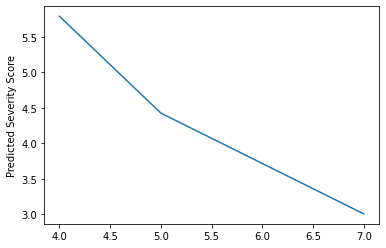

In [61]:
#model = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=rs_const, n_jobs=-1)
model = linear_model.ElasticNet(alpha=0.01, l1_ratio=0.015, random_state=rs_const, )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_series = pd.Series(y_pred, index=y_test.index)

y_pred_series.plot()
plt.ylabel("Predicted Severity Score")
plt.show()

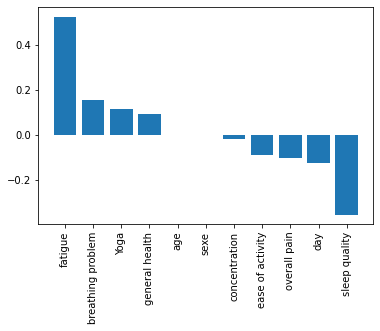

In [62]:
importances = model.coef_
sorted_index = np.argsort(importances)[::-1]
x_values = range(len(importances))
labels = np.array(X_train.columns)[sorted_index]
plt.bar(x_values, importances[sorted_index], tick_label=labels)
plt.xticks(rotation=90)
plt.show()

In [63]:
print(model.score(X_test, y_test))

0.9518857477531286
